<a href="https://colab.research.google.com/github/johngull/lr-scheduling-miniworkshop/blob/master/Some_useful_LR_scheduling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to manage learning rate

##Classic training

In [1]:
# Lets import everything, load dataset and create standard model first

from keras.datasets import cifar10
from keras.applications import ResNet50
from keras import callbacks, optimizers
from keras.callbacks import Callback
import keras.backend as K
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

results = {"name": [], "loss": [], "accuracy": [], "epochs": []}

Using TensorFlow backend.


In [2]:
#small and dump model
from keras import layers, Model

input_t = layers.Input((None, None, 3))

x = layers.Conv2D(16, 3, padding='same', activation='relu')(input_t)
x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(10, activation='softmax')(x)

model = Model(input_t, x)

W0724 09:58:24.636225 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 09:58:24.659122 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 09:58:24.664605 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 09:58:24.697282 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
# save init weights for reinit
model.save_weights('init_weights.h5')

W0724 09:58:24.817935 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 09:58:24.825187 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [4]:
clb = [
    callbacks.ReduceLROnPlateau(patience=5, verbose=True),
    callbacks.EarlyStopping(patience=11, verbose=True),
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True)
]

model.compile(optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=100,
                    callbacks=clb)

W0724 09:58:25.466709 140559071815552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 09:58:25.670672 140559071815552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 9s 206us/step - loss: 2.2116 - sparse_categorical_accuracy: 0.1599 - val_loss: 1.9335 - val_sparse_categorical_accuracy: 0.2772
Epoch 2/100
45000/45000 [==============================] - 8s 175us/step - loss: 1.8558 - sparse_categorical_accuracy: 0.3086 - val_loss: 1.7199 - val_sparse_categorical_accuracy: 0.3624
Epoch 3/100
45000/45000 [==============================] - 8s 176us/step - loss: 1.6303 - sparse_categorical_accuracy: 0.4039 - val_loss: 1.4933 - val_sparse_categorical_accuracy: 0.4682
Epoch 4/100
45000/45000 [==============================] - 8s 176us/step - loss: 1.4511 - sparse_categorical_accuracy: 0.4806 - val_loss: 1.5531 - val_sparse_categorical_accuracy: 0.4668
Epoch 5/100
45000/45000 [==============================] - 8s 176us/step - loss: 1.3303 - sparse_categorical_accuracy: 0.5291 - val_loss: 1.4469 - val_sparse_categorical_accuracy: 0.5062
Epoch 6/100
4500

In [5]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 107us/step
[0.9062560894012451, 0.6996]


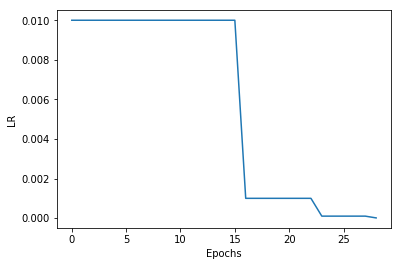

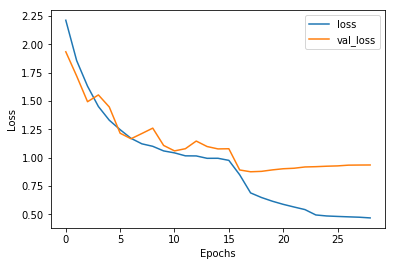

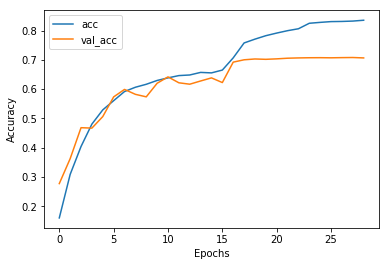

In [6]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['lr'])
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("ReduceLROnPlateau SGD")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

### What if we use Adam?

In [7]:
model.compile(optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=100,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 10s 216us/step - loss: 1.6859 - sparse_categorical_accuracy: 0.3783 - val_loss: 1.4379 - val_sparse_categorical_accuracy: 0.4574
Epoch 2/100
45000/45000 [==============================] - 9s 203us/step - loss: 1.2501 - sparse_categorical_accuracy: 0.5518 - val_loss: 1.1654 - val_sparse_categorical_accuracy: 0.5686
Epoch 3/100
45000/45000 [==============================] - 9s 202us/step - loss: 1.0618 - sparse_categorical_accuracy: 0.6228 - val_loss: 1.0664 - val_sparse_categorical_accuracy: 0.6180
Epoch 4/100
45000/45000 [==============================] - 9s 203us/step - loss: 0.9534 - sparse_categorical_accuracy: 0.6607 - val_loss: 0.9620 - val_sparse_categorical_accuracy: 0.6566
Epoch 5/100
45000/45000 [==============================] - 9s 202us/step - loss: 0.8805 - sparse_categorical_accuracy: 0.6910 - val_loss: 0.9583 - val_sparse_categorical_accuracy: 0.6558
Epoch 6/100
450

In [8]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 106us/step
[0.870013236618042, 0.7127]


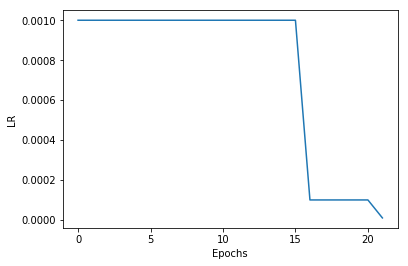

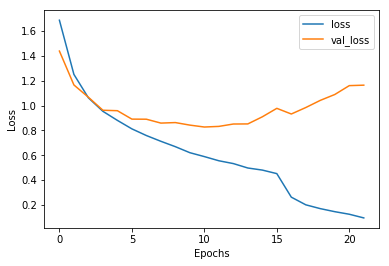

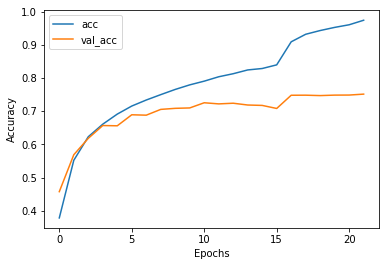

In [9]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['lr'])
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("ReduceLROnPlateau Adam")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

##Annealing
![](https://miro.medium.com/max/864/1*iSZv0xuVCsCCK7Z4UiXf2g.jpeg)

In [0]:
# @title LossHistoryCallback

class LossHistory(Callback):
    def on_epoch_end(self, batch, logs=None):
      logs = logs or {}
#       logs['lr'] = self.model.optimizer.lr / (1. + self.model.optimizer.decay * self.model.optimizer.iterations)
      logs['lr'] = K.get_value(self.model.optimizer.lr * (1. / (1. + self.model.optimizer.decay * K.cast(self.model.optimizer.iterations, K.dtype(self.model.optimizer.decay)))))


In [11]:
clb = [
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True),
    LossHistory()
]

max_lr = 1e-2
min_lr = 1e-4
epochs = 20
decay = (max_lr-min_lr)/epochs
model.compile(optimizers.SGD(momentum=0.9, lr=max_lr, decay=decay), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=epochs,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 8s 186us/step - loss: 2.1925 - sparse_categorical_accuracy: 0.1653 - val_loss: 1.9850 - val_sparse_categorical_accuracy: 0.2460
Epoch 2/20
45000/45000 [==============================] - 8s 175us/step - loss: 1.9129 - sparse_categorical_accuracy: 0.2862 - val_loss: 1.9476 - val_sparse_categorical_accuracy: 0.2960
Epoch 3/20
45000/45000 [==============================] - 8s 174us/step - loss: 1.7214 - sparse_categorical_accuracy: 0.3658 - val_loss: 1.6576 - val_sparse_categorical_accuracy: 0.3868
Epoch 4/20
45000/45000 [==============================] - 8s 175us/step - loss: 1.5825 - sparse_categorical_accuracy: 0.4256 - val_loss: 1.5376 - val_sparse_categorical_accuracy: 0.4342
Epoch 5/20
45000/45000 [==============================] - 8s 176us/step - loss: 1.4758 - sparse_categorical_accuracy: 0.4703 - val_loss: 1.3971 - val_sparse_categorical_accuracy: 0.4982
Epoch 6/20
45000/4500

In [12]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 107us/step
[1.0835775760650634, 0.6324]


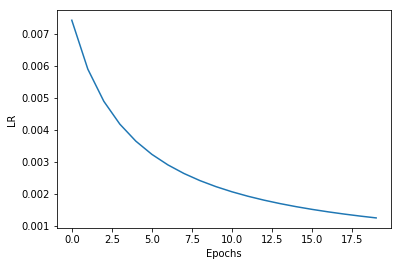

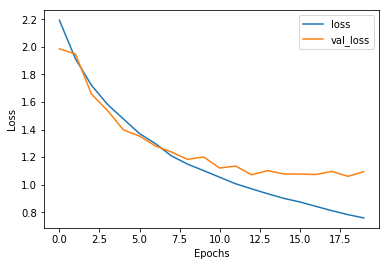

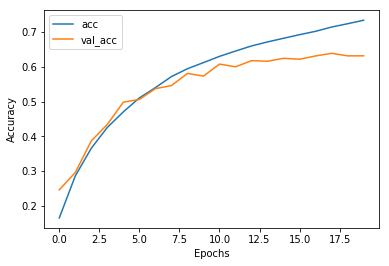

In [13]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['lr'])
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("Decay SGD")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

###We need to try Adam for sure

In [14]:
clb = [
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True),
    LossHistory()
]

max_lr = 1e-3
min_lr = 1e-5
epochs = 15
decay = (max_lr-min_lr)/epochs
model.compile(optimizers.Adam(lr=max_lr, decay=decay), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=epochs,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 10s 223us/step - loss: 1.7202 - sparse_categorical_accuracy: 0.3613 - val_loss: 1.4240 - val_sparse_categorical_accuracy: 0.4682
Epoch 2/15
45000/45000 [==============================] - 9s 208us/step - loss: 1.2788 - sparse_categorical_accuracy: 0.5354 - val_loss: 1.1951 - val_sparse_categorical_accuracy: 0.5496
Epoch 3/15
45000/45000 [==============================] - 9s 205us/step - loss: 1.0805 - sparse_categorical_accuracy: 0.6119 - val_loss: 1.0725 - val_sparse_categorical_accuracy: 0.6150
Epoch 4/15
45000/45000 [==============================] - 9s 202us/step - loss: 0.9484 - sparse_categorical_accuracy: 0.6639 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.6672
Epoch 5/15
45000/45000 [==============================] - 9s 203us/step - loss: 0.8553 - sparse_categorical_accuracy: 0.6987 - val_loss: 0.9529 - val_sparse_categorical_accuracy: 0.6658
Epoch 6/15
45000/450

In [15]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 106us/step
[0.8125775549888611, 0.7392]


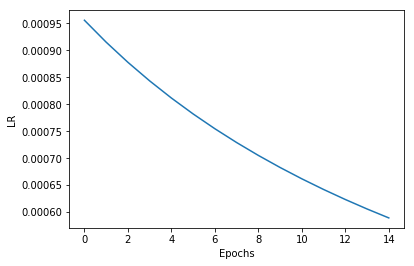

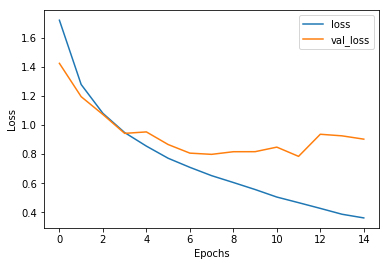

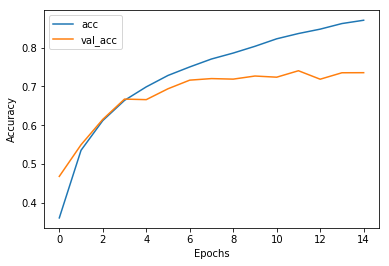

In [16]:
epochs = range(len(history.history['loss']))

plt.plot(epochs, history.history['lr'])
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("Decay Adam")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

## Cosine Annealing (SGDR)

Idea is to change LR more frequent.

High Lr to avoid local minimums, low Lr for precise result
![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Cosine-Annealing-Learning-Rate-Schedule.png)

In [0]:
# @title LRFinderCallback

class LrfinderCallBack(Callback):
    def __init__(self, points, metric='loss', min_2_power=-15, max_2_power=2):
        self.points = np.logspace(min_2_power, max_2_power, num=points)
        self.pos = -1
        self.values = np.zeros((points,), dtype=np.float32)

        self.metric = metric

    def _setLR(self):
        self.pos += 1
        if self.pos < len(self.points):
            K.set_value(self.model.optimizer.lr, self.points[self.pos])
        else:
            self.model.stop_training = True

    def _collectMetric(self, logs):
        if self.pos < len(self.points):
            self.values[self.pos] = logs[self.metric]

    def on_train_begin(self, logs={}):
        self._setLR()

    def on_batch_end(self, batch, logs={}):
        self._collectMetric(logs)
        self._setLR()

    def getPlotPoints(self):
        return self.points, self.values

Epoch 1/1
12608/45000 [=======>......................] - ETA: 7s - loss: 5.5286

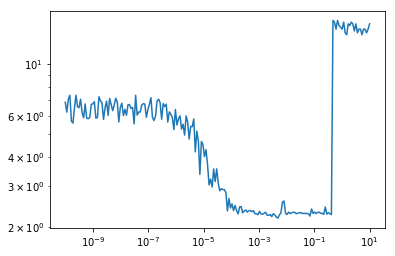

In [18]:
model.compile(optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy')

lrcallback = LrfinderCallBack(200, min_2_power=-10, max_2_power=1)

model.load_weights('init_weights.h5')
model.fit(x_train, y_train,
          batch_size=64,
          epochs=int(np.ceil(200/len(x_train))),
          callbacks=[lrcallback])

x,y = lrcallback.getPlotPoints()
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [0]:
# @title SGDRCallback


class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.

    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```

    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`.
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.

    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [20]:
clb = [
    SGDRScheduler(min_lr=1e-5, max_lr=1e-2,
                  steps_per_epoch=np.ceil(len(x_train)/64),
                  cycle_length=5,
                  mult_factor=1.5),
    callbacks.EarlyStopping(patience=11, verbose=True),
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True)
]

model.compile(optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=100,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 10s 226us/step - loss: 2.1868 - sparse_categorical_accuracy: 0.1775 - val_loss: 1.9555 - val_sparse_categorical_accuracy: 0.2626
Epoch 2/100
45000/45000 [==============================] - 10s 218us/step - loss: 1.8545 - sparse_categorical_accuracy: 0.3026 - val_loss: 1.6997 - val_sparse_categorical_accuracy: 0.3630
Epoch 3/100
45000/45000 [==============================] - 10s 221us/step - loss: 1.6384 - sparse_categorical_accuracy: 0.3955 - val_loss: 1.5448 - val_sparse_categorical_accuracy: 0.4168
Epoch 4/100
45000/45000 [==============================] - 10s 224us/step - loss: 1.4667 - sparse_categorical_accuracy: 0.4635 - val_loss: 1.3900 - val_sparse_categorical_accuracy: 0.4886
Epoch 5/100
45000/45000 [==============================] - 10s 221us/step - loss: 1.3444 - sparse_categorical_accuracy: 0.5118 - val_loss: 1.3386 - val_sparse_categorical_accuracy: 0.5066
Epoch 6/100

In [21]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 110us/step
[0.9119039267539978, 0.7043]


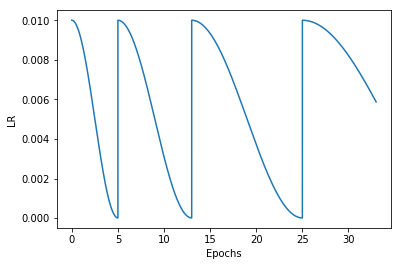

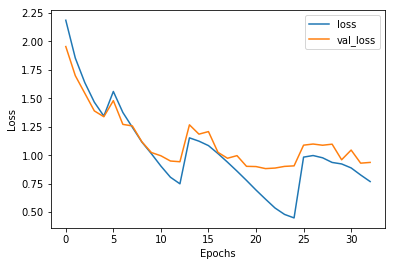

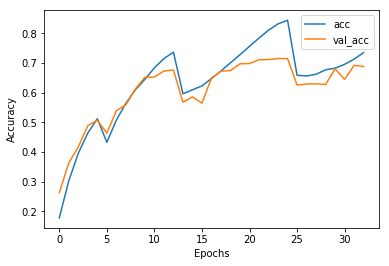

In [22]:
epochs = range(len(history.history['loss']))

lr_values = clb[0].history['lr']
lr_epochs = np.linspace(0, len(epochs), len(lr_values))
plt.plot(lr_epochs, lr_values)
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("SGDR")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

### Will this trick work with the Adam?

Epoch 1/1
12736/45000 [=======>......................] - ETA: 8s - loss: 4.7783

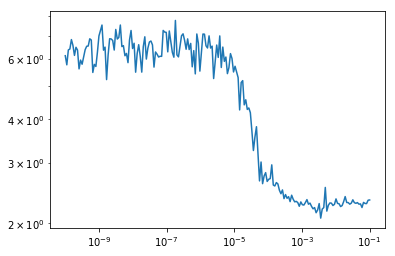

In [23]:
model.compile(optimizers.Adam(), loss='sparse_categorical_crossentropy')

lrcallback = LrfinderCallBack(200, min_2_power=-10, max_2_power=-1)

model.load_weights('init_weights.h5')
model.fit(x_train, y_train,
          batch_size=64,
          epochs=int(np.ceil(200/len(x_train))),
          callbacks=[lrcallback])

x,y = lrcallback.getPlotPoints()
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [24]:
clb = [
    SGDRScheduler(min_lr=1e-6, max_lr=1e-3,
                  steps_per_epoch=np.ceil(len(x_train)/64),
                  cycle_length=3,
                  mult_factor=1.5),
    callbacks.EarlyStopping(patience=11, verbose=True),
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True)
]

model.compile(optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=100,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 12s 268us/step - loss: 1.7014 - sparse_categorical_accuracy: 0.3718 - val_loss: 1.4358 - val_sparse_categorical_accuracy: 0.4726
Epoch 2/100
45000/45000 [==============================] - 11s 253us/step - loss: 1.2761 - sparse_categorical_accuracy: 0.5369 - val_loss: 1.1480 - val_sparse_categorical_accuracy: 0.5884
Epoch 3/100
45000/45000 [==============================] - 11s 254us/step - loss: 1.0743 - sparse_categorical_accuracy: 0.6144 - val_loss: 1.0835 - val_sparse_categorical_accuracy: 0.6108
Epoch 4/100
45000/45000 [==============================] - 12s 257us/step - loss: 1.1685 - sparse_categorical_accuracy: 0.5831 - val_loss: 1.0929 - val_sparse_categorical_accuracy: 0.6122
Epoch 5/100
45000/45000 [==============================] - 11s 255us/step - loss: 1.0034 - sparse_categorical_accuracy: 0.6435 - val_loss: 1.0231 - val_sparse_categorical_accuracy: 0.6284
Epoch 6/100

In [25]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 121us/step
[0.8454062054634094, 0.7238]


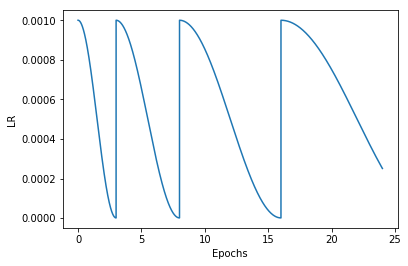

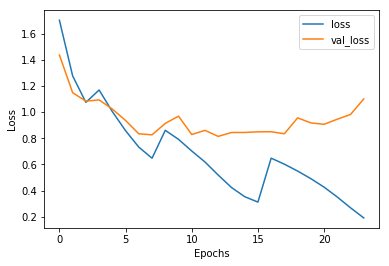

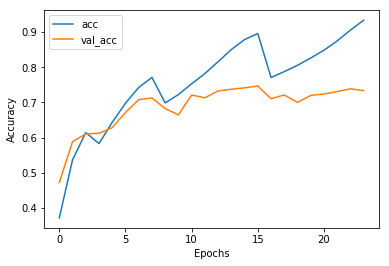

In [26]:
epochs = range(len(history.history['loss']))

lr_values = clb[0].history['lr']
lr_epochs = np.linspace(0, len(epochs), len(lr_values))
plt.plot(lr_epochs, lr_values)
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("SGDR Adam")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

## 1-cycle Policy

What if we can do it with single period

![](https://sgugger.github.io/images/art5_lr_schedule.png)

In [0]:
# @title OneCycleLR

class OneCycleLR(Callback):
    def __init__(self,
                 max_lr,
                 end_percentage=0.1,
                 scale_percentage=None,
                 maximum_momentum=0.95,
                 minimum_momentum=0.85,
                 verbose=True):
        """ This callback implements a cyclical learning rate policy (CLR).
        This is a special case of Cyclic Learning Rates, where we have only 1 cycle.
        After the completion of 1 cycle, the learning rate will decrease rapidly to
        100th its initial lowest value.
        # Arguments:
            max_lr: Float. Initial learning rate. This also sets the
                starting learning rate (which will be 10x smaller than
                this), and will increase to this value during the first cycle.
            end_percentage: Float. The percentage of all the epochs of training
                that will be dedicated to sharply decreasing the learning
                rate after the completion of 1 cycle. Must be between 0 and 1.
            scale_percentage: Float or None. If float, must be between 0 and 1.
                If None, it will compute the scale_percentage automatically
                based on the `end_percentage`.
            maximum_momentum: Optional. Sets the maximum momentum (initial)
                value, which gradually drops to its lowest value in half-cycle,
                then gradually increases again to stay constant at this max value.
                Can only be used with SGD Optimizer.
            minimum_momentum: Optional. Sets the minimum momentum at the end of
                the half-cycle. Can only be used with SGD Optimizer.
            verbose: Bool. Whether to print the current learning rate after every
                epoch.
        # Reference
            - [A disciplined approach to neural network hyper-parameters: Part 1 -- learning rate, batch size, weight_decay, and weight decay](https://arxiv.org/abs/1803.09820)
            - [Super-Convergence: Very Fast Training of Residual Networks Using Large Learning Rates](https://arxiv.org/abs/1708.07120)
        """
        super(OneCycleLR, self).__init__()

        if end_percentage < 0. or end_percentage > 1.:
            raise ValueError("`end_percentage` must be between 0 and 1")

        if scale_percentage is not None and (scale_percentage < 0. or scale_percentage > 1.):
            raise ValueError("`scale_percentage` must be between 0 and 1")

        self.initial_lr = max_lr
        self.end_percentage = end_percentage
        self.scale = float(scale_percentage) if scale_percentage is not None else float(end_percentage)
        self.max_momentum = maximum_momentum
        self.min_momentum = minimum_momentum
        self.verbose = verbose

        if self.max_momentum is not None and self.min_momentum is not None:
            self._update_momentum = True
        else:
            self._update_momentum = False

        self.clr_iterations = 0.
        self.history = {}

        self.epochs = None
        self.batch_size = None
        self.samples = None
        self.steps = None
        self.num_iterations = None
        self.mid_cycle_id = None

    def _reset(self):
        """
        Reset the callback.
        """
        self.clr_iterations = 0.
        self.history = {}

    def compute_lr(self):
        """
        Compute the learning rate based on which phase of the cycle it is in.
        - If in the first half of training, the learning rate gradually increases.
        - If in the second half of training, the learning rate gradually decreases.
        - If in the final `end_percentage` portion of training, the learning rate
            is quickly reduced to near 100th of the original min learning rate.
        # Returns:
            the new learning rate
        """
        if self.clr_iterations > 2 * self.mid_cycle_id:
            current_percentage = (self.clr_iterations - 2 * self.mid_cycle_id)
            current_percentage /= float((self.num_iterations - 2 * self.mid_cycle_id))
            new_lr = self.initial_lr * (1. + (current_percentage *
                                              (1. - 100.) / 100.)) * self.scale

        elif self.clr_iterations > self.mid_cycle_id:
            current_percentage = 1. - (
                self.clr_iterations - self.mid_cycle_id) / self.mid_cycle_id
            new_lr = self.initial_lr * (1. + current_percentage *
                                        (self.scale * 100 - 1.)) * self.scale

        else:
            current_percentage = self.clr_iterations / self.mid_cycle_id
            new_lr = self.initial_lr * (1. + current_percentage *
                                        (self.scale * 100 - 1.)) * self.scale

        if self.clr_iterations == self.num_iterations:
            self.clr_iterations = 0

        return new_lr

    def compute_momentum(self):
        """
         Compute the momentum based on which phase of the cycle it is in.
        - If in the first half of training, the momentum gradually decreases.
        - If in the second half of training, the momentum gradually increases.
        - If in the final `end_percentage` portion of training, the momentum value
            is kept constant at the maximum initial value.
        # Returns:
            the new momentum value
        """
        if self.clr_iterations > 2 * self.mid_cycle_id:
            new_momentum = self.max_momentum

        elif self.clr_iterations > self.mid_cycle_id:
            current_percentage = 1. - ((self.clr_iterations - self.mid_cycle_id) / float(
                                        self.mid_cycle_id))
            new_momentum = self.max_momentum - current_percentage * (
                self.max_momentum - self.min_momentum)

        else:
            current_percentage = self.clr_iterations / float(self.mid_cycle_id)
            new_momentum = self.max_momentum - current_percentage * (
                self.max_momentum - self.min_momentum)

        return new_momentum

    def on_train_begin(self, logs={}):
        logs = logs or {}

        self.epochs = self.params['epochs']
        self.batch_size = self.params['batch_size']
        self.samples = self.params['samples']
        self.steps = self.params['steps']

        if self.steps is not None:
            self.num_iterations = self.epochs * self.steps
        else:
            if (self.samples % self.batch_size) == 0:
                remainder = 0
            else:
                remainder = 1
            self.num_iterations = (self.epochs + remainder) * self.samples // self.batch_size

        self.mid_cycle_id = int(self.num_iterations * ((1. - self.end_percentage)) / float(2))

        self._reset()
        K.set_value(self.model.optimizer.lr, self.compute_lr())

        if self._update_momentum:
            if not hasattr(self.model.optimizer, 'momentum'):
                raise ValueError("Momentum can be updated only on SGD optimizer !")

            new_momentum = self.compute_momentum()
            K.set_value(self.model.optimizer.momentum, new_momentum)

    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}

        self.clr_iterations += 1
        new_lr = self.compute_lr()

        self.history.setdefault('lr', []).append(
            K.get_value(self.model.optimizer.lr))
        K.set_value(self.model.optimizer.lr, new_lr)

        if self._update_momentum:
            if not hasattr(self.model.optimizer, 'momentum'):
                raise ValueError("Momentum can be updated only on SGD optimizer !")

            new_momentum = self.compute_momentum()

            self.history.setdefault('momentum', []).append(
                K.get_value(self.model.optimizer.momentum))
            K.set_value(self.model.optimizer.momentum, new_momentum)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

    def on_epoch_end(self, epoch, logs=None):
        if self.verbose:
            if self._update_momentum:
                print(" - lr: %0.5f - momentum: %0.2f " %
                      (self.history['lr'][-1], self.history['momentum'][-1]))

            else:
                print(" - lr: %0.5f " % (self.history['lr'][-1]))

In [28]:
clb = [
    OneCycleLR(max_lr=1e-2, verbose=False,
               maximum_momentum=0.95,
               minimum_momentum=0.85),
    callbacks.EarlyStopping(patience=11, verbose=True),
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True)
]

model.compile(optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=10,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
  704/45000 [..............................] - ETA: 39s - loss: 2.9684 - sparse_categorical_accuracy: 0.1151

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108504). Check your callbacks.
  % delta_t_median)


45000/45000 [==============================] - 14s 312us/step - loss: 2.0383 - sparse_categorical_accuracy: 0.2357 - val_loss: 1.8232 - val_sparse_categorical_accuracy: 0.3162
Epoch 2/10
45000/45000 [==============================] - 13s 292us/step - loss: 1.5645 - sparse_categorical_accuracy: 0.4255 - val_loss: 1.5067 - val_sparse_categorical_accuracy: 0.4558
Epoch 3/10
45000/45000 [==============================] - 12s 276us/step - loss: 1.3456 - sparse_categorical_accuracy: 0.5180 - val_loss: 1.2865 - val_sparse_categorical_accuracy: 0.5498
Epoch 4/10
45000/45000 [==============================] - 12s 270us/step - loss: 1.2041 - sparse_categorical_accuracy: 0.5738 - val_loss: 1.4531 - val_sparse_categorical_accuracy: 0.5080
Epoch 5/10
45000/45000 [==============================] - 12s 273us/step - loss: 1.0933 - sparse_categorical_accuracy: 0.6171 - val_loss: 1.1580 - val_sparse_categorical_accuracy: 0.6022
Epoch 6/10
45000/45000 [==============================] - 12s 267us/step - l

In [29]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 123us/step
[0.8635230790138244, 0.7117]


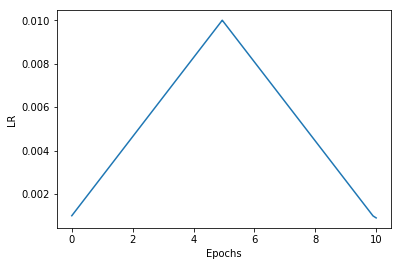

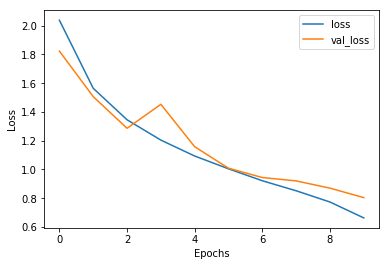

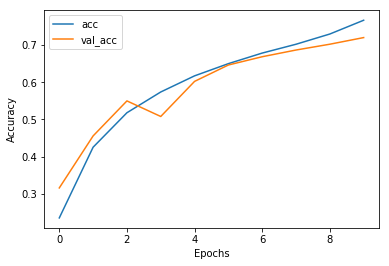

In [30]:
epochs = range(len(history.history['loss']))

lr_values = clb[0].history['lr']
lr_epochs = np.linspace(0, len(epochs), len(lr_values))
plt.plot(lr_epochs, lr_values)
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("1cycle SGD")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

###But I want my Adam! :)
###And  less epochs!

In [31]:
clb = [
    OneCycleLR(max_lr=1e-3, verbose=False,
               maximum_momentum=None,
               minimum_momentum=None),
    callbacks.EarlyStopping(patience=11, verbose=True),
    callbacks.ModelCheckpoint('weights.h5', save_best_only=True, save_weights_only=True)
]

model.compile(optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.load_weights('init_weights.h5')
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=64,
                    epochs=6,
                    callbacks=clb)

Train on 45000 samples, validate on 5000 samples
Epoch 1/6
45000/45000 [==============================] - 13s 285us/step - loss: 1.8178 - sparse_categorical_accuracy: 0.3460 - val_loss: 1.5083 - val_sparse_categorical_accuracy: 0.4538
Epoch 2/6
45000/45000 [==============================] - 12s 265us/step - loss: 1.4135 - sparse_categorical_accuracy: 0.4886 - val_loss: 1.4106 - val_sparse_categorical_accuracy: 0.4868
Epoch 3/6
45000/45000 [==============================] - 12s 263us/step - loss: 1.2208 - sparse_categorical_accuracy: 0.5655 - val_loss: 1.3180 - val_sparse_categorical_accuracy: 0.5182
Epoch 4/6
45000/45000 [==============================] - 12s 265us/step - loss: 1.0608 - sparse_categorical_accuracy: 0.6268 - val_loss: 1.0875 - val_sparse_categorical_accuracy: 0.6174
Epoch 5/6
45000/45000 [==============================] - 12s 266us/step - loss: 0.8977 - sparse_categorical_accuracy: 0.6872 - val_loss: 0.8970 - val_sparse_categorical_accuracy: 0.6894
Epoch 6/6
45000/45000

In [32]:
model.load_weights('weights.h5')
eval_res = model.evaluate(x_test, y_test)
print(eval_res)

10000/10000 [==============================] - 1s 121us/step
[0.8279580427169799, 0.7142]


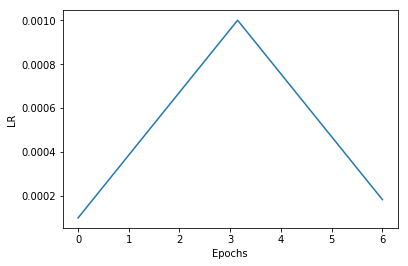

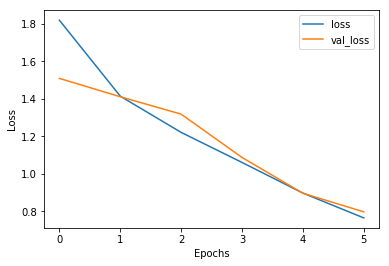

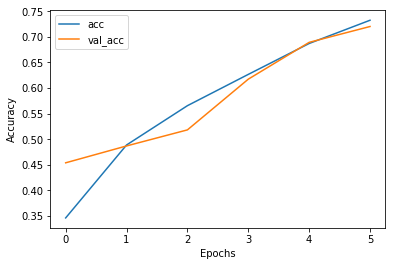

In [33]:
epochs = range(len(history.history['loss']))

lr_values = clb[0].history['lr']
lr_epochs = np.linspace(0, len(epochs), len(lr_values))
plt.plot(lr_epochs, lr_values)
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, history.history['sparse_categorical_accuracy'], label='acc')
plt.plot(epochs, history.history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results["name"].append("1cycle Adam")
results["loss"].append(eval_res[0])
results["accuracy"].append(eval_res[1])
results["epochs"].append(len(history.history['loss']))

Note: Seems this 1-cycle implementation has bugs, so please don't use it

##Summary table

In [34]:
import pandas as pd
from IPython.display import display, HTML

results_df = pd.DataFrame.from_dict(results)

display(HTML(results_df.to_html(index=False)))

name,loss,accuracy,epochs
ReduceLROnPlateau SGD,0.906256,0.6996,29
ReduceLROnPlateau Adam,0.870013,0.7127,22
Decay SGD,1.083578,0.6324,20
Decay Adam,0.812578,0.7392,15
SGDR,0.911904,0.7043,33
SGDR Adam,0.845406,0.7238,24
1cycle SGD,0.863523,0.7117,10
1cycle Adam,0.827958,0.7142,6
